# S11 T01 Train_test

In [98]:
# Dataframe de demora en aerolineas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [99]:
# doy formato a los floats para que no muestren decimales, analizando los datos se ve que se trata de enteros
pd.options.display.float_format = '{:.0f}'.format

# Cargar los datos de demora de aerolíneas en un dataframe
delays = pd.read_csv('DelayedFlights.csv', sep=',')
print(delays.info())

# Look at the first rows
delays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


### This dataset is composed by the following variables:
1. Year 2008
2. Month 1-12
3. DayofMonth 1-31
4. DayOfWeek 1 (Monday) - 7 (Sunday)
5. DepTime actual departure time (local, hhmm)
6. CRSDepTime scheduled departure time (local, hhmm)
7. ArrTime actual arrival time (local, hhmm)
8. CRSArrTime scheduled arrival time (local, hhmm)
9. UniqueCarrier unique carrier code
10. FlightNum flight number
11. TailNum plane tail number: aircraft registration, unique aircraft identifier
12. ActualElapsedTime in minutes
13. vCRSElapsedTime in minutes
14. AirTime in minutes
15. ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
16. DepDelay departure delay, in minutes
17. Origin origin IATA airport code
18. Dest destination IATA airport code
19. Distance in miles
20. TaxiIn taxi in time, in minutes
21. TaxiOut taxi out time in minutes
22. Cancelled *was the flight cancelled
23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted 1 = yes, 0 = no
25. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
28. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [100]:
# hay valores nulos?
delays.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [101]:
# la fila 3 parece tener todos los campos completos
delays.iloc[3]

Unnamed: 0                4
Year                   2008
Month                     1
DayofMonth                3
DayOfWeek                 4
DepTime                1829
CRSDepTime             1755
ArrTime                1959
CRSArrTime             1925
UniqueCarrier            WN
FlightNum              3920
TailNum              N464WN
ActualElapsedTime        90
CRSElapsedTime           90
AirTime                  77
ArrDelay                 34
DepDelay                 34
Origin                  IND
Dest                    BWI
Distance                515
TaxiIn                    3
TaxiOut                  10
Cancelled                 0
CancellationCode          N
Diverted                  0
CarrierDelay              2
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay        32
Name: 3, dtype: object

In [102]:
# Qué pasa con las observaciones que tienen ArrDelay nulo?
filtro1 = delays.ArrDelay.isnull() 
filtro2 = (delays.Diverted == 1)
print('Cantidad de ArrDelay en nulos:', len(delays[filtro1]))
print('Cantidad de Diverted:', len(delays[filtro2]))
print('Cantidad de Diverted y además no tiene ArrDelay:', delays['Diverted'][filtro1 & filtro2].count())


Cantidad de ArrDelay en nulos: 8387
Cantidad de Diverted: 7754
Cantidad de Diverted y además no tiene ArrDelay: 7754


Todos los vuelvos que fueron Diverted tienen valor de ArrDelay nulo. Qué pasa con los 8387-7754 nulos que quedan?

In [103]:
len(delays[(delays.ArrDelay.isnull()) & (delays.Diverted == 0)])

633

In [104]:
len(delays[(delays.ArrDelay.isnull()) & (delays.Cancelled == 1)])

633

El resto de los vuelos están cancelados. Por lo tanto en todos los registros tengo:

Dato de ArrDelay o Diverted en 1 o Cancelled en 1. 

In [105]:
delays['ArrDelay'].describe()

count   1928371
mean         42
std          57
min        -109
25%           9
50%          24
75%          56
max        2461
Name: ArrDelay, dtype: float64

In [106]:
# Borro la columna Unnamed
delays = delays.drop(delays.columns[[0]], axis='columns')

<AxesSubplot:>

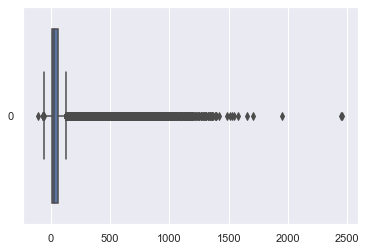

In [107]:
# Cómo se distribuye la variable ArrDelay?
sns.boxplot(data =delays.ArrDelay, orient='h')

In [108]:
# Hay muy poco valores mayores que 1600
delays[(delays.ArrDelay>1600)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
322516,2008,2,3,7,1117,1820,2256,555,NW,808,...,6,16,0,N,0,1455,0,4,0,1002
686014,2008,4,10,4,724,1417,858,1605,NW,1699,...,8,14,0,N,0,2436,0,0,0,17
839306,2008,5,6,2,2,1530,254,1823,NW,1107,...,10,17,0,N,0,1951,0,0,0,0
1009553,2008,6,20,5,2140,1710,2252,1825,MQ,3538,...,6,16,0,N,0,1707,0,0,0,0
1881639,2008,12,19,5,1602,1325,1921,1546,NW,357,...,8,59,0,N,0,1307,0,58,0,290


In [109]:
# Son sólo 5 de un total de 1.928.371, podemos coincidir en que son casos 
# muy aislados y no nos interesa tenerlos en cuenta en este momento.
# Los elimino.

delays = delays[(delays.ArrDelay <= 1600) | (delays.ArrDelay.isnull())]
delays['ArrDelay'].describe()

count   1928366
mean         42
std          57
min        -109
25%           9
50%          24
75%          56
max        1583
Name: ArrDelay, dtype: float64

In [110]:
# Como eliminé filas debo rearmar el índice
delays.reset_index(drop=True, inplace=True)

<AxesSubplot:>

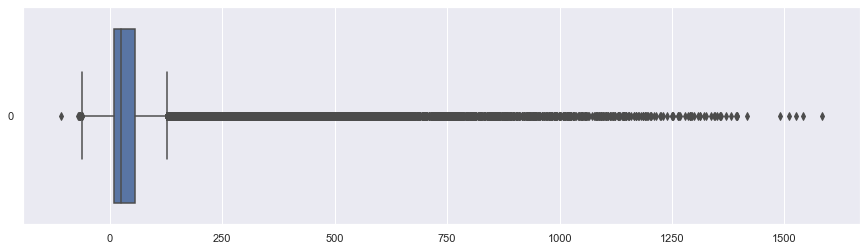

In [111]:
# Cómo se distribuye la variable ArrDelay?
plt.figure(figsize =(15, 4))
sns.boxplot(data =delays.ArrDelay, orient='h')

In [112]:
delays.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936753,1936753,1936753,1936753,1936753,1936753,1929643,1936753,1936753,1928366,...,1936753,1929643,1936298,1936753,1936753,1247483,1247483,1247483,1247483,1247483
mean,2008,6,16,4,1519,1467,1610,1634,2184,133,...,766,7,18,0,0,19,4,15,0,25
std,0,3,9,2,450,425,548,465,1945,72,...,574,5,14,0,0,43,21,34,2,42
min,2008,1,1,1,1,0,1,0,1,14,...,11,0,0,0,0,0,0,0,0,0
25%,2008,3,8,2,1203,1135,1316,1325,610,80,...,338,4,10,0,0,0,0,0,0,0
50%,2008,6,16,4,1545,1510,1715,1705,1543,116,...,606,6,14,0,0,2,0,2,0,8
75%,2008,9,23,6,1900,1815,2030,2014,3422,165,...,998,8,21,0,0,21,0,15,0,33
max,2008,12,31,7,2400,2359,2400,2400,9742,1114,...,4962,240,422,1,1,1552,1352,1357,392,1316


In [113]:
# Hago un binning por grupos de demora en arribo
bins = [0, 10, 30, 3000]
labels = ['en hora','demorado','muy demorado']
pd.cut(delays['ArrDelay'], bins=bins, labels=labels)


0                   NaN
1               en hora
2              demorado
3          muy demorado
4              demorado
               ...     
1936748        demorado
1936749    muy demorado
1936750    muy demorado
1936751         en hora
1936752             NaN
Name: ArrDelay, Length: 1936753, dtype: category
Categories (3, object): ['en hora' < 'demorado' < 'muy demorado']

Hay valores de ArrDelay que son nulos

### Me interesa predecir si un vuelo va medianamente a llegar a tiempo, va a estar demorado o cancelado o redirigido. 
Considero que un vuelo está demorado si llegó mas de 15 minutos tarde. 

Lo primero que necesito es obtener esa información en mi dataset, creo una columna Target, con valores:
* 0 si llegó puntual o hasta 15 min demorado
* 1 si demoró más de 15 minutos en llegar
* 2 si fue cancelado
* 3 si fue redirigido a otro aeropuerto

In [114]:
for dat in delays:
    delays.loc[delays['ArrDelay'] <= 15, 'target'] = 0
    delays.loc[delays['ArrDelay'] > 15, 'target'] = 1
    delays.loc[delays['Cancelled'] == 1, 'target'] = 2
    delays.loc[delays['Diverted'] == 1, 'target'] = 3

# no pude usar ésto porque había valores de ArrDekay que eran nulos
# delays['Delayed'] = np.where(delays['ArrDelay']>=15, 1, 0)
delays.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,8,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,10,0,N,0,NaN,NaN,NaN,NaN,NaN,0
2,2008,1,3,4,628,620,804,750,WN,448,...,17,0,N,0,NaN,NaN,NaN,NaN,NaN,0
3,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,10,0,N,0,2,0,0,0,32,1
4,2008,1,3,4,1940,1915,2121,2110,WN,378,...,10,0,N,0,NaN,NaN,NaN,NaN,NaN,0


In [115]:
# veo como quedó
delays.iloc[:,14:]

,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
0,-14,8,IAD,TPA,810,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,2,19,IAD,TPA,810,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN,0
2,14,8,IND,BWI,515,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN,0
3,34,34,IND,BWI,515,3,10,0,N,0,2,0,0,0,32,1
4,11,25,IND,JAX,688,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936748,25,30,MSP,ATL,906,9,18,0,N,0,3,0,0,0,22,1
1936749,75,57,RIC,ATL,481,15,34,0,N,0,0,57,18,0,0,1
1936750,99,80,ATL,IAH,689,8,32,0,N,0,1,0,19,0,79,1
1936751,9,11,IAD,ATL,533,13,13,0,N,0,NaN,NaN,NaN,NaN,NaN,0


In [116]:
df = delays.copy()
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,8,0,N,0,NaN,NaN,NaN,NaN,NaN,0
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,10,0,N,0,NaN,NaN,NaN,NaN,NaN,0
2,2008,1,3,4,628,620,804,750,WN,448,...,17,0,N,0,NaN,NaN,NaN,NaN,NaN,0
3,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,10,0,N,0,2,0,0,0,32,1
4,2008,1,3,4,1940,1915,2121,2110,WN,378,...,10,0,N,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936748,2008,12,13,6,1250,1220,1617,1552,DL,1621,...,18,0,N,0,3,0,0,0,22,1
1936749,2008,12,13,6,657,600,904,749,DL,1631,...,34,0,N,0,0,57,18,0,0,1
1936750,2008,12,13,6,1007,847,1149,1010,DL,1631,...,32,0,N,0,1,0,19,0,79,1
1936751,2008,12,13,6,1251,1240,1446,1437,DL,1639,...,13,0,N,0,NaN,NaN,NaN,NaN,NaN,0


In [117]:
# Elimino variables que no me interesan
df = df.drop(['Year','Month','DayofMonth','DayOfWeek','TaxiIn','TaxiOut','FlightNum','TailNum','UniqueCarrier','Origin','Dest','DepTime','CRSDepTime'], axis = 1)


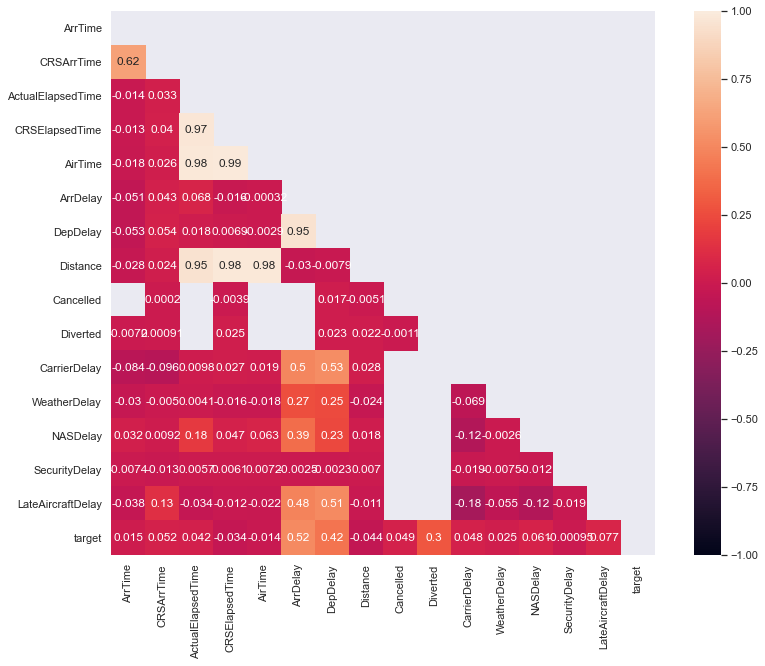

In [118]:
# analizo las relaciones entre las variables
correlac = df.corr()
mascara = np.triu(correlac)
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlac, vmax=1, vmin=-1, square=True, mask=mascara, annot=True);
plt.show()

In [119]:
# Elimino variables con alta correlación
df = df.drop(['Cancelled','Diverted','CRSElapsedTime','ActualElapsedTime'], axis=1)

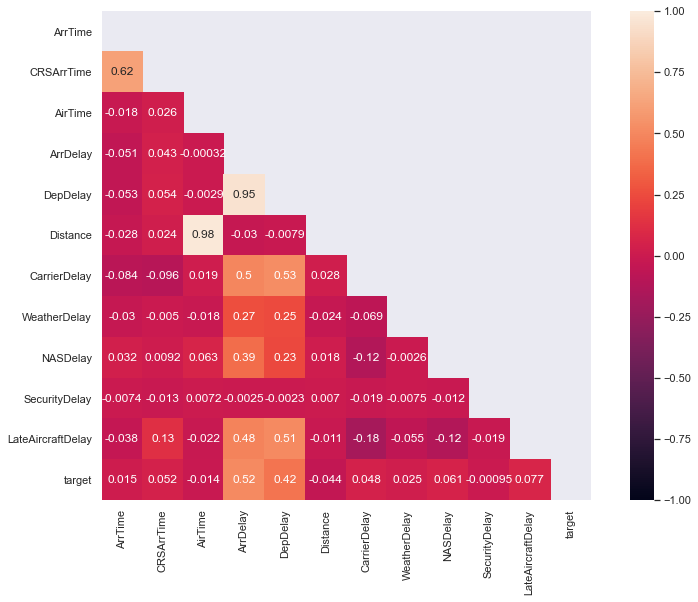

In [120]:
# analizo las relaciones entre las variables
correlac = df.corr()
mascara = np.triu(correlac)
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(correlac, vmax=1, vmin=-1, square=True, mask=mascara, annot=True);
plt.show()

## Exercici 1
Partir el conjunto de datos en train y test

In [121]:
# La última columna, target, es la que quiero predecir. 
data = df.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

(1936753, 12) (1936753,)


In [122]:
# Cómo se distribuyen los valores de target?
Counter(data[:, -1])

Counter({0.0: 713359, 1.0: 1215007, 3.0: 7754, 2.0: 633})

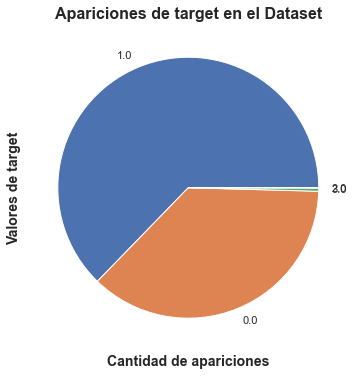

In [123]:
# Reutilizo de S04 T01
# define a function to plot a categorial variable
def plot_cat(vble):
    # take out the name of the column
    col_name = pd.DataFrame(vble).keys()[0]
    
    # calculate the values to display (counts)
    counts = vble.value_counts()
    # use a pie plot
    counts_bar = counts.plot(kind='pie', y=vble, figsize =(6, 6))
    
    # set titles
    counts_bar.set_title("Apariciones de {} en el Dataset".format(col_name), fontsize=16, weight="bold")
    counts_bar.set_xlabel("Cantidad de apariciones", fontsize=14, weight = "bold")
    counts_bar.set_ylabel("Valores de " + col_name,  fontsize=14, weight="bold")
    plt.show()
    
    # use a horizontal bar plot
    # counts_bar = counts.plot(kind='barh', y=vble)
    # plt.show()
    return



plot_cat(df.target)

In [124]:
# Armo los grupos de train y test
# Me interesa que tanto train como test estén balanceadas con respecto a los valores de df.target
X_train, X_test = train_test_split(df, test_size=0.3, random_state=1, stratify = df.target)

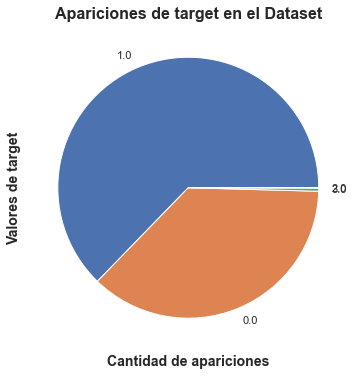

In [125]:
plot_cat(X_train.target)

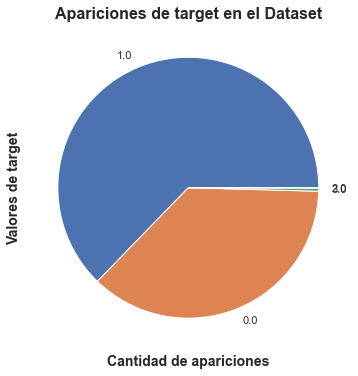

In [126]:
plot_cat(X_test.target)

Se mantienen las proporciones como quería

In [127]:
print(Counter(X_train.target))
print(Counter(X_test.target))

Counter({1.0: 850505, 0.0: 499351, 3.0: 5428, 2.0: 443})
Counter({1.0: 364502, 0.0: 214008, 3.0: 2326, 2.0: 190})


In [128]:
# ArrDelay también mantiene sus características: media, mediana, quartiles, etc. 
# Esto no lo garantiza el train_test, pero justo esta variable está directamente relacionada con el target

X_train.ArrDelay.describe()

count   1349856
mean         42
std          57
min        -109
25%           9
50%          24
75%          56
max        1583
Name: ArrDelay, dtype: float64

In [129]:
X_test.ArrDelay.describe()

count   578510
mean        42
std         57
min        -69
25%          9
50%         24
75%         56
max       1510
Name: ArrDelay, dtype: float64

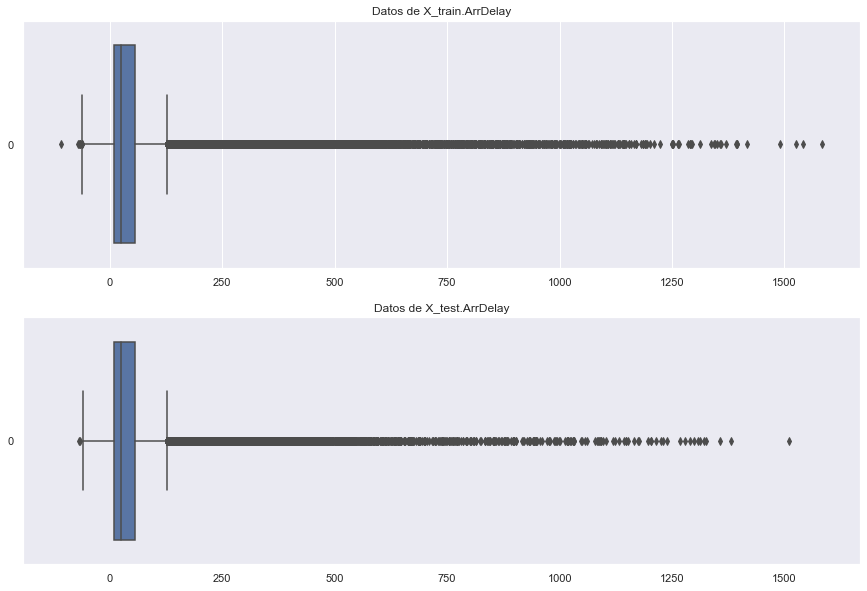

In [130]:
# Grafico las ArrDelay en ambos conjuntos de datos
plt.figure(figsize=(15,10))

# datos de X_train
plt.subplot(2,1,1)
ax1= sns.boxplot(data=X_train.ArrDelay.values, orient='h');
plt.title('Datos de X_train.ArrDelay');

# datos de X_test
plt.subplot(2,1,2, sharex = ax1)
sns.boxplot(data=X_test.ArrDelay.values, orient='h');
plt.title('Datos de X_test.ArrDelay');
plt.grid(axis='x')

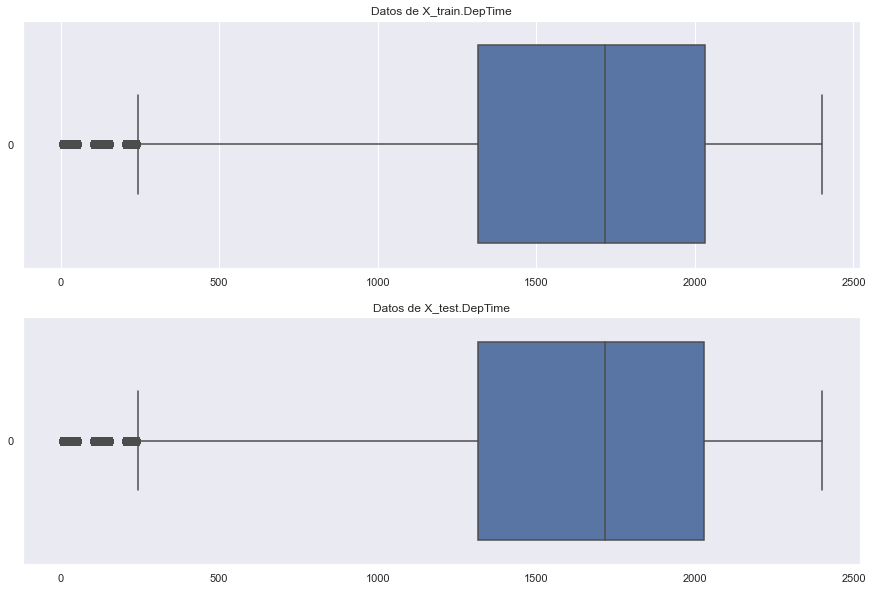

In [131]:
# Esto no necesariamente se cumple para otras variables
# Pruebo con ArrTime que no se relaciona para nada con el target
plt.figure(figsize=(15,10))

# datos de X_train
plt.subplot(2,1,1)
ax1 = sns.boxplot(data=X_train.ArrTime.values, orient='h');
plt.title('Datos de X_train.DepTime');

# datos de X_test
plt.subplot(2,1,2, sharex = ax1)
sns.boxplot(data=X_test.ArrTime.values, orient='h');
plt.title('Datos de X_test.DepTime');
plt.grid(axis='x')

In [132]:
X_train.ArrTime.describe()

count   1350768
mean       1610
std         548
min           1
25%        1316
50%        1715
75%        2031
max        2400
Name: ArrTime, dtype: float64

In [133]:
X_test.ArrTime.describe()

count   578875
mean      1610
std        548
min          1
25%       1316
50%       1715
75%       2030
max       2400
Name: ArrTime, dtype: float64

Y, sin embargo, esta varible también está balanceada en los dos conjuntos de datos


In [134]:
df.ArrTime.describe()

count   1929643
mean       1610
std         548
min           1
25%        1316
50%        1715
75%        2030
max        2400
Name: ArrTime, dtype: float64

In [135]:
X_train.describe()

,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
count,1350768,1355727,1349856,1349856,1355727,1355727,873157,873157,873157,873157,873157,1355727
mean,1610,1634,108,42,43,765,19,4,15,0,25,1
std,548,465,69,57,53,574,43,22,34,2,42,1
min,1,0,0,-109,6,11,0,0,0,0,0,0
25%,1316,1325,58,9,12,338,0,0,0,0,0,0
50%,1715,1706,90,24,24,606,2,0,2,0,8,1
75%,2031,2015,137,56,53,998,21,0,15,0,33,1
max,2400,2400,1091,1583,1552,4962,1552,1352,1337,392,1236,3


In [136]:
X_test.describe()

,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
count,578875,581026,578510,578510,581026,581026,374326,374326,374326,374326,374326,581026
mean,1610,1634,108,42,43,767,19,4,15,0,25,1
std,548,465,69,57,53,576,43,21,34,2,42,1
min,1,0,0,-69,6,11,0,0,0,0,0,0
25%,1316,1325,58,9,12,340,0,0,0,0,0,0
50%,1715,1705,90,24,24,607,2,0,2,0,8,1
75%,2030,2013,137,56,53,998,21,0,15,0,34,1
max,2400,2400,733,1510,1518,4962,1510,1225,1357,284,1316,3


Las medias y las medianas casi coinciden en todas las variables

## Exercici 2
Crear columnas nuevas y estandarizar los datos numéricos

In [137]:
df.describe()


,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target
count,1929643,1936753,1928366,1928366,1936753,1936753,1247483,1247483,1247483,1247483,1247483,1936753
mean,1610,1634,108,42,43,766,19,4,15,0,25,1
std,548,465,69,57,53,574,43,21,34,2,42,1
min,1,0,0,-109,6,11,0,0,0,0,0,0
25%,1316,1325,58,9,12,338,0,0,0,0,0,0
50%,1715,1705,90,24,24,606,2,0,2,0,8,1
75%,2030,2014,137,56,53,998,21,0,15,0,33,1
max,2400,2400,1091,1583,1552,4962,1552,1352,1357,392,1316,3


In [138]:
# Considero que los vuelos de más de 5 horas son largos y el resto son Cortos (5*60 = 300)
df['Long'] = np.where(df['AirTime'] > 300, 'Largo', 'Corto')

In [139]:
df.head()

,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target,Long
0,2211,2225,116,-14,8,810,N,NaN,NaN,NaN,NaN,NaN,0,Corto
1,1002,1000,113,2,19,810,N,NaN,NaN,NaN,NaN,NaN,0,Corto
2,804,750,76,14,8,515,N,NaN,NaN,NaN,NaN,NaN,0,Corto
3,1959,1925,77,34,34,515,N,2,0,0,0,32,1,Corto
4,2121,2110,87,11,25,688,N,NaN,NaN,NaN,NaN,NaN,0,Corto


In [140]:
# Quiero columnas "Corto" y "Largo"
new = pd.get_dummies(df.Long)
new

,Corto,Largo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1936748,1,0
1936749,1,0
1936750,1,0
1936751,1,0


In [141]:
df['CancellationCode'].unique()

array(['N', 'A', 'B', 'C'], dtype=object)

In [142]:
# Quiero columnas "Corto" y "Largo"
newcc = pd.get_dummies(df.CancellationCode)
newcc

,A,B,C,N
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1936748,0,0,0,1
1936749,0,0,0,1
1936750,0,0,0,1
1936751,0,0,0,1


In [143]:
df = pd.concat([df, new, newcc], axis=1)
df = df.drop('Long', axis=1)
df = df.drop('CancellationCode', axis=1)
df

,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,target,Corto,Largo,A,B,C,N
0,2211,2225,116,-14,8,810,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1
1,1002,1000,113,2,19,810,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1
2,804,750,76,14,8,515,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1
3,1959,1925,77,34,34,515,2,0,0,0,32,1,1,0,0,0,0,1
4,2121,2110,87,11,25,688,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936748,1617,1552,120,25,30,906,3,0,0,0,22,1,1,0,0,0,0,1
1936749,904,749,78,75,57,481,0,57,18,0,0,1,1,0,0,0,0,1
1936750,1149,1010,122,99,80,689,1,0,19,0,79,1,1,0,0,0,0,1
1936751,1446,1437,89,9,11,533,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1


In [144]:
df[['DepDelay','Distance']]

,DepDelay,Distance
0,8,810
1,19,810
2,8,515
3,34,515
4,25,688
...,...,...
1936748,30,906
1936749,57,481
1936750,80,689
1936751,11,533


In [145]:
# Creo una transformación polinomial para DepDelay y Distance
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(df[['DepDelay','Distance']])
print(len(data))

1936753


In [146]:
cols = ['pol1','pol2','pol3','pol4','pol5','pol6']
pol_data = pd.DataFrame(data=data, columns=cols)
pol_data

,pol1,pol2,pol3,pol4,pol5,pol6
0,1,8,810,64,6480,656100
1,1,19,810,361,15390,656100
2,1,8,515,64,4120,265225
3,1,34,515,1156,17510,265225
4,1,25,688,625,17200,473344
...,...,...,...,...,...,...
1936748,1,30,906,900,27180,820836
1936749,1,57,481,3249,27417,231361
1936750,1,80,689,6400,55120,474721
1936751,1,11,533,121,5863,284089


In [147]:
df = pd.concat([df, pol_data], axis=1)
df

,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,...,A,B,C,N,pol1,pol2,pol3,pol4,pol5,pol6
0,2211,2225,116,-14,8,810,NaN,NaN,NaN,NaN,...,0,0,0,1,1,8,810,64,6480,656100
1,1002,1000,113,2,19,810,NaN,NaN,NaN,NaN,...,0,0,0,1,1,19,810,361,15390,656100
2,804,750,76,14,8,515,NaN,NaN,NaN,NaN,...,0,0,0,1,1,8,515,64,4120,265225
3,1959,1925,77,34,34,515,2,0,0,0,...,0,0,0,1,1,34,515,1156,17510,265225
4,2121,2110,87,11,25,688,NaN,NaN,NaN,NaN,...,0,0,0,1,1,25,688,625,17200,473344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936748,1617,1552,120,25,30,906,3,0,0,0,...,0,0,0,1,1,30,906,900,27180,820836
1936749,904,749,78,75,57,481,0,57,18,0,...,0,0,0,1,1,57,481,3249,27417,231361
1936750,1149,1010,122,99,80,689,1,0,19,0,...,0,0,0,1,1,80,689,6400,55120,474721
1936751,1446,1437,89,9,11,533,NaN,NaN,NaN,NaN,...,0,0,0,1,1,11,533,121,5863,284089


In [148]:
df = df.drop(['target'], axis=1)
df

,ArrTime,CRSArrTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,...,A,B,C,N,pol1,pol2,pol3,pol4,pol5,pol6
0,2211,2225,116,-14,8,810,NaN,NaN,NaN,NaN,...,0,0,0,1,1,8,810,64,6480,656100
1,1002,1000,113,2,19,810,NaN,NaN,NaN,NaN,...,0,0,0,1,1,19,810,361,15390,656100
2,804,750,76,14,8,515,NaN,NaN,NaN,NaN,...,0,0,0,1,1,8,515,64,4120,265225
3,1959,1925,77,34,34,515,2,0,0,0,...,0,0,0,1,1,34,515,1156,17510,265225
4,2121,2110,87,11,25,688,NaN,NaN,NaN,NaN,...,0,0,0,1,1,25,688,625,17200,473344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936748,1617,1552,120,25,30,906,3,0,0,0,...,0,0,0,1,1,30,906,900,27180,820836
1936749,904,749,78,75,57,481,0,57,18,0,...,0,0,0,1,1,57,481,3249,27417,231361
1936750,1149,1010,122,99,80,689,1,0,19,0,...,0,0,0,1,1,80,689,6400,55120,474721
1936751,1446,1437,89,9,11,533,NaN,NaN,NaN,NaN,...,0,0,0,1,1,11,533,121,5863,284089


In [149]:
# inicializar el Scaler
ss = StandardScaler()
# transformar los datos
Xstd = ss.fit_transform(df.values)


In [150]:
Xstd = pd.DataFrame(Xstd)
Xstd

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,1,0,-1,-1,0,NaN,NaN,NaN,NaN,...,-0,-0,-0,0,0,-1,0,-0,-0,-0
1,-1,-1,0,-1,-0,0,NaN,NaN,NaN,NaN,...,-0,-0,-0,0,0,-0,0,-0,-0,-0
2,-1,-2,-0,-0,-1,-0,NaN,NaN,NaN,NaN,...,-0,-0,-0,0,0,-1,-0,-0,-0,-0
3,1,1,-0,-0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,0,0,-0,-0,-0,-0,-0
4,1,1,-0,-1,-0,-0,NaN,NaN,NaN,NaN,...,-0,-0,-0,0,0,-0,-0,-0,-0,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936748,0,-0,0,-0,-0,0,-0,-0,-0,-0,...,-0,-0,-0,0,0,-0,0,-0,-0,-0
1936749,-1,-2,-0,1,0,-0,-0,2,0,-0,...,-0,-0,-0,0,0,0,-0,-0,-0,-0
1936750,-1,-1,0,1,1,-0,-0,-0,0,-0,...,-0,-0,-0,0,0,1,-0,0,0,-0
1936751,-0,-0,-0,-1,-1,-0,NaN,NaN,NaN,NaN,...,-0,-0,-0,0,0,-1,-0,-0,-0,-0


## Exercici 3
Analizar gráfica y numéricamente los datos del ejercicio anterior

In [151]:
Xstd.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,1929643,1936753,1928366,1928366,1936753,1936753,1247483,1247483,1247483,1247483,...,1936753,1936753,1936753,1936753,1936753,1936753,1936753,1936753,1936753,1936753
mean,0,0,-0,0,0,0,0,0,0,0,...,-0,0,-0,-0,0,0,0,0,-0,-0
std,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
min,-3,-4,-2,-3,-1,-1,-0,-0,-0,-0,...,-0,-0,-0,-55,0,-1,-1,-0,-1,-1
25%,-1,-1,-1,-1,-1,-1,-0,-0,-0,-0,...,-0,-0,-0,0,0,-1,-1,-0,-0,-1
50%,0,0,-0,-0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,0,0,-0,-0,-0,-0,-0
75%,1,1,0,0,0,0,0,-0,-0,-0,...,-0,-0,-0,0,0,0,0,-0,0,0
max,1,2,14,27,28,7,35,63,40,194,...,89,79,156,0,0,28,7,108,93,16


Al estar estandarizados los datos tienen media 0 y desviación estándar 1. 

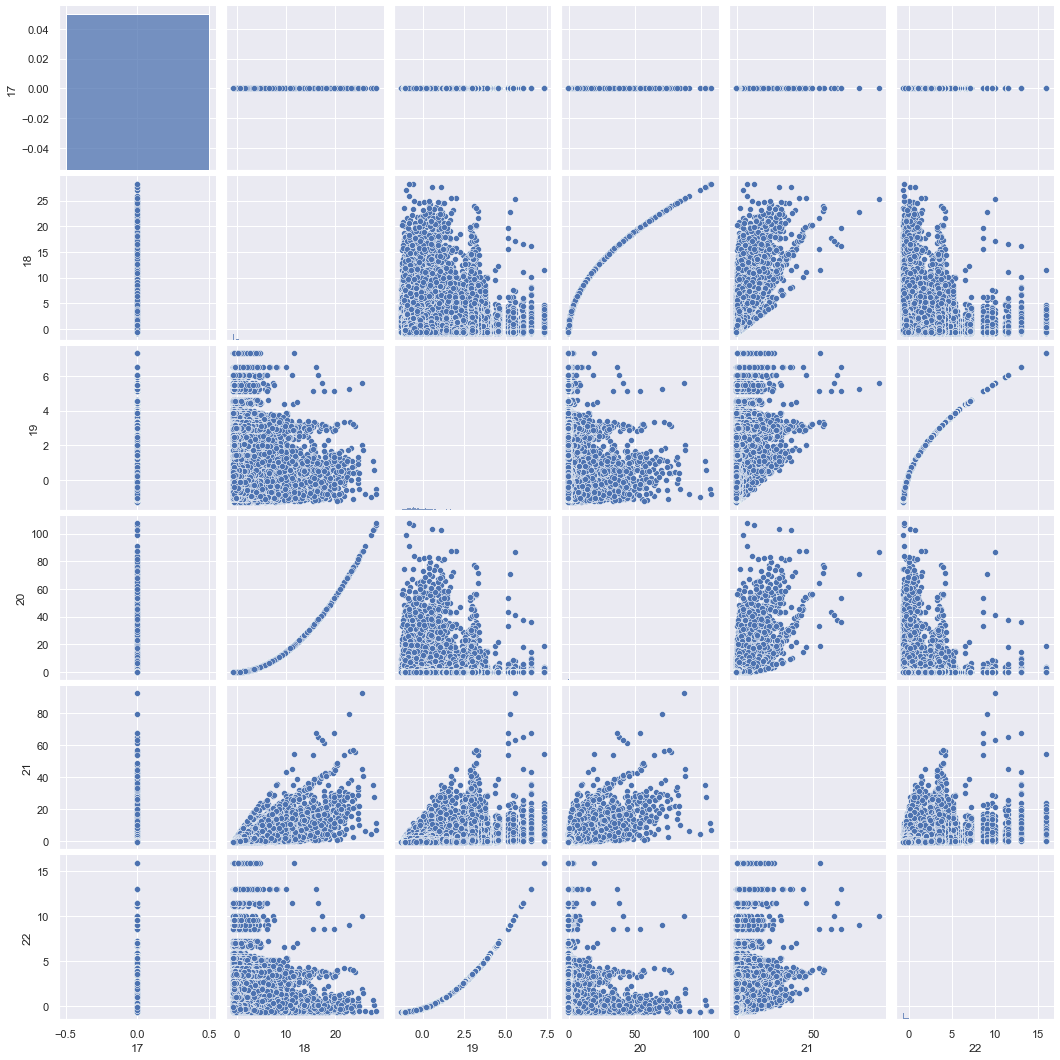

In [152]:
# Comparación de variables estandarizadas de a pares 
sns.set()
sns.pairplot(Xstd.iloc[:,17:23], height = 2.5)
plt.show()


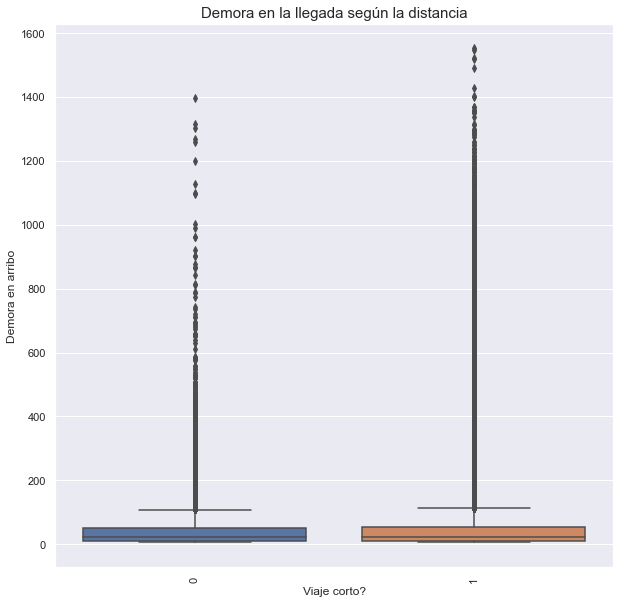

In [153]:
# Demora en la llegada siendo corto o no
plt.figure(figsize =(10, 10))
sns.boxplot(x=df.Corto, y=df.DepDelay)
plt.title('Demora en la llegada según la distancia', fontsize=15)
plt.xlabel("Viaje corto?")
plt.ylabel("Demora en arribo")
plt.xticks(rotation='vertical')
plt.show()

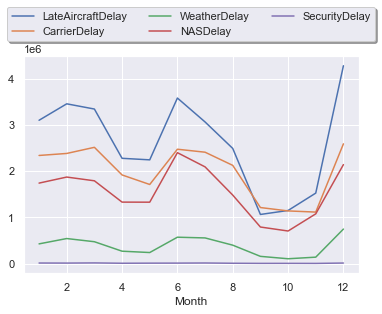

In [154]:
# Tipos de demora por mes 
df2 = delays.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')[['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay']].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()